In [5]:
import folium
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import squarify 
import pandas as pd
from matplotlib.sankey import Sankey
import seaborn as sns
import time

In [6]:
def load_census_data(directory):
    # Load census data from given directory
    df = []
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(directory,filename),skiprows=1)
            df_temp["Year_ID"] = filename[:4] + df_temp['Id2'].map(str)
            df_temp = df_temp.set_index("Year_ID")
            df.append(df_temp)


    census_data = pd.concat(df)
    return census_data
def load_drug_data():
    
    census_data = load_census_data("data/census_data_2013/")
    
    drug_data = pd.read_excel('data/drug_data.xlsx', sheet_name = "Data")
   # drug_data = drug_data[drug_data["YYYY"] >= 2013]
    drug_data["Year_ID"] = drug_data["YYYY"].map(str) + drug_data["FIPS_Combined"].map(str)
    drug_data = drug_data.set_index("Year_ID")
    fips = drug_data["FIPS_Combined"].map(str).apply(lambda x: x[2:])[~drug_data.index.duplicated()]
    state = drug_data[["State","YYYY","COUNTY"]][~drug_data.index.duplicated()]
    
    drug_piv = drug_data.pivot(columns="SubstanceName", values=["DrugReports"])

    drug_piv[["TotalDrugReportsCounty","TotalDrugReportsState"]] = drug_data.drop_duplicates(subset=["TotalDrugReportsCounty","TotalDrugReportsState"])[["TotalDrugReportsCounty","TotalDrugReportsState"]]
    
    drug_piv["Total"] = drug_piv["DrugReports"].sum(axis=1).fillna(0)
    drug_piv["FIPS"] = fips
    drug_piv[["State","Year","Name"]] = state
    drug_piv["DrugReportsPerCapita"] = drug_piv["Total"]/census_data["Estimate; RELATIONSHIP - Population in households"]
    return drug_piv


In [3]:
drug_data = load_drug_data()
drug_data

/home/ryanibarra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


DrugReports                                    \
SubstanceName 3,4-Methylenedioxy U-47700 3-Fluorofentanyl 3-Methylfentanyl   
Year_ID                                                                      
201021001                            NaN              NaN              NaN   
201021003                            NaN              NaN              NaN   
201021005                            NaN              NaN              NaN   
201021007                            NaN              NaN              NaN   
201021009                            NaN              NaN              NaN   
201021011                            NaN              NaN              NaN   
201021013                            NaN              NaN              NaN   
201021015                            NaN              NaN              NaN   
201021017                            NaN              NaN              NaN   
201021019                            NaN              NaN              NaN   
201021021                            NaN              NaN              NaN   
201021023                            NaN              NaN              NaN   
201021025                            NaN              NaN              NaN   
201021027                            NaN              NaN              NaN   
201021029                            NaN              NaN              NaN   
201021031                            NaN              NaN              NaN   
201021033                            NaN              NaN              NaN   
201021035                            NaN              NaN              NaN   
201021037                            NaN              NaN              NaN   
201021039                            NaN              NaN              NaN   
201021041                            NaN              NaN              NaN   
201021043                            NaN              NaN              NaN   
201021045                            NaN              NaN              NaN   
201021047                            NaN              NaN              NaN   
201021049                            NaN              NaN              NaN   
201021051                            NaN              NaN              NaN   
201021053                            NaN              NaN              NaN   
201021055                            NaN              NaN              NaN   
201021057                            NaN              NaN              NaN   
201021059                            NaN              NaN              NaN   
...                                  ...              ...              ...   
201754025                            NaN              NaN              NaN   
201754027                            NaN              NaN              NaN   
201754029                            NaN              NaN              NaN   
201754033                            NaN              NaN              NaN   
201754035                            NaN              NaN              NaN   
201754037                            NaN              NaN              NaN   
201754039                            NaN              NaN              3.0   
201754041                            NaN              NaN              NaN   
201754045                            NaN              NaN              NaN   
201754049                            NaN              NaN              NaN   
201754051                            NaN              NaN              NaN   
201754055                            NaN              NaN              NaN   
201754057                            NaN              NaN              NaN   
201754059                            NaN              NaN              NaN   
201754063                            NaN              NaN              NaN   
201754065                            NaN              NaN              NaN   
201754067                            NaN              NaN              NaN   
201754069                            NaN           

In [4]:
drug_data.groupby(["State","Year","FIPS"]["TotalDrugReportsCounty"].nlargest(3).groupby("State"))

TypeError: list indices must be integers or slices, not str

In [7]:
street_drugs = ['Opium', 'Opiates', 'Acetylcodeine']

fentanyl = ['Fentanyl', 'Acetyl fentanyl', 'Butyryl fentanyl',
       'Furanyl fentanyl', 'p-Fluorobutyryl fentanyl', 'cis-3-methylfentanyl',
       'Valeryl fentanyl', 'Carfentanil', 'Acryl fentanyl', 'U-47700',
       '3-Methylfentanyl', '4-Fluoroisobutyryl fentanyl',
       'trans-3-Methylfentanyl', 'p-methoxybutyryl fentanyl',
       'Tetrahydrofuran fentanyl', 'p-Fluorofentanyl', 'o-Fluorofentanyl',
       '3-Fluorofentanyl', 'Fluorofentanyl', 'Fluoroisobutyryl fentanyl',
       'Fluorobutyryl fentanyl ', 'Furanyl/3-Furanyl fentanyl',
       'Cyclopropyl fentanyl', 'Methoxyacetyl fentanyl', 'Phenyl fentanyl',
       'Benzylfentanyl', 'U-48800', 'U-49900', 'Crotonyl fentanyl',
       '3,4-Methylenedioxy U-47700', 'U-51754',
       'Cyclopropyl/Crotonyl Fentanyl', 'Isobutyryl fentanyl',
       'Cyclopentyl fentanyl', '4-Methylfentanyl'] 

prescription = ['Propoxyphene', 'Morphine', 'Methadone', 'Hydromorphone', 'Oxycodone',
 'Oxymorphone', 'Dextropropoxyphene', 'Buprenorphine', 'Hydrocodone', 'Meperidine',
 'Methorphan', 'Codeine', 'Tramadol', 'Pethidine', 'Dihydrocodeine',
 'Pentazocine','Thebaine', 'Butorphanol', 'ANPP',
 'Desmethylprodine ', 'Mitragynine', 'Acetyldihydrocodeine', 'Hydrocodeinone',
 'MT-45', 'Levorphanol', 'Metazocine']
HeroinData = drug_data.groupby(["State","Year"]).sum()["DrugReports"]['Heroin']
StreetDrugData = drug_data.groupby(["State","Year"]).sum()["DrugReports"][street_drugs].sum(axis=1)
FentanylData = drug_data.groupby(["State","Year"]).sum()["DrugReports"][fentanyl].sum(axis=1)
PrescriptionData = drug_data.groupby(["State","Year"]).sum()["DrugReports"][prescription].sum(axis=1)
frames = [HeroinData, StreetDrugData, FentanylData, PrescriptionData]
result = pd.concat(frames,axis=1)
result.rename(columns={0:'Other',1:'Fentanyls',2:'Prescription'},inplace=True)
result

Heroin  Other  Fentanyls  Prescription
State Year                                         
KY    2010    629.0    0.0       17.0        9807.0
      2011    899.0    0.0       31.0        9359.0
      2012   2320.0    0.0       15.0        8387.0
      2013   4175.0    0.0       25.0        6948.0
      2014   4362.0    0.0      233.0        6486.0
      2015   4045.0    0.0      536.0        5284.0
      2016   3716.0    0.0     1210.0        4167.0
      2017   3231.0    1.0     2825.0        3337.0
OH    2010   9301.0   18.0       56.0       10332.0
      2011  11004.0   10.0       52.0        9264.0
      2012  14633.0   12.0       42.0        8458.0
      2013  18340.0    9.0      111.0        8386.0
      2014  20590.0    0.0     1375.0        8895.0
      2015  23347.0    0.0     4344.0        9436.0
      2016  20877.0    9.0    11829.0        9755.0
      2017  15045.0    0.0    22137.0        8922.0
PA    2010  12102.0    1.0       57.0        7652.0
      2011  11741.0    1.0       49.0        8196.0
      2012  13086.0    0.0       49.0        6823.0
      2013  14745.0    1.0       86.0        5577.0
      2014  18454.0    2.0      439.0        6009.0
      2015  18964.0    1.0     1304.0        5382.0
      2016  17559.0    5.0     3980.0        4620.0
      2017  13256.0    0.0    10117.0        4521.0
VA    2010   2298.0    1.0       41.0        6345.0
      2011   1193.0    2.0       41.0        5512.0
      2012   1709.0    1.0       39.0        6082.0
      2013   4396.0   15.0      133.0        7131.0
      2014   3132.0    3.0      174.0        5728.0
      2015   3583.0    1.0      292.0        4934.0
      2016   4261.0    2.0     1038.0        4894.0
      2017   3869.0    4.0     2141.0        4434.0
WV    2010    902.0    5.0        8.0        1975.0
      2011    949.0    0.0       12.0        2310.0
      2012   1175.0    0.0        7.0        2194.0
      2013   1857.0    0.0        3.0        2186.0
      2014   1516.0    0.0       50.0        1714.0
      2015   1135.0    0.0      155.0        1281.0
      2016   1168.0    0.0      230.0        1150.0
      2017    751.0    0.0      314.0         549.0

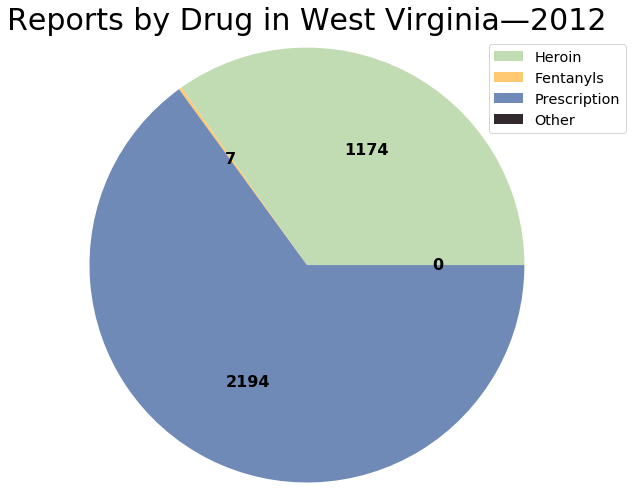

In [28]:
%matplotlib inline
#inputs:
#state="OH",ect.
#year=2013-2017
def CreatePieChart(state,year,):
    if (state == 'KY'):
        STATE = 'Kentucky'
    elif (state == 'OH'):
        STATE = "Ohio"
    elif (state == 'PA'):
        STATE = "Pennsylvania"
    elif (state == 'VA'):
        STATE = "Virginia"
    elif (state == "WV"):
        STATE = "West Virginia"
    else:
        STATE = "AllStates"
        
        
    if (state=="AllStates"):
        data = [int(drugsbydata.groupby("Year").sum()["Heroin"].loc[year]),int(drugsbydata.groupby("Year").sum()["Fentanyl"].loc[year]),int(drugsbydata.groupby("Year").sum()["Prescription"].loc[year]),int(drugsbydata.groupby("Year").sum()["Other"].loc[year])]
        wedges, texts, autotexts = plt.pie(data,
                        colors=["#c1dbb3","#ffc971","#6F8AB7","#32292F"],
                     radius=2.5,
                     autopct = lambda pct: "{0}".format(int(pct/100*np.sum(data))),
                     )
    else:
        data = [int(result.Heroin[state,year,]),int(result.Fentanyls[state,year,]),int(result.Prescription[state,year]),int(result.Other[state,year])]
        wedges, texts, autotexts = plt.pie(data,
                        colors=["#c1dbb3","#ffc971","#6F8AB7","#32292F"],
                     radius=2.5,
                     autopct = lambda pct: "{0}".format(int(pct/100*np.sum(data))),
                     )

    plt.legend(['Heroin','Fentanyls','Prescription','Other'],loc='upper right', bbox_to_anchor=(2.0, 1.55,0,0), fontsize='x-large'
    )
    if (state == "AllStates"):
        plt.title('Total Opoiod Drug Reports in \u2014'+str(year), fontdict = {'fontsize': 30, 'verticalalignment':'top'}, pad=150)
    else:
        plt.title('Reports by Drug in '+STATE+'\u2014'+str(year), fontdict = {'fontsize': 30, 'verticalalignment':'top'}, pad=150)
    plt.setp(autotexts, size=16, weight='bold')
    
    
    filename = f"{state}_DrugPieChart_{year}"
    plt.savefig(filename+'.png', bbox_inches='tight')
    plt.show()
    
CreatePieChart(state='WV',year=2012)

In [ ]:
drugsbydata.groupby("Year").sum()["Heroin"].loc[2016]

In [ ]:
drug_data.head()

In [9]:
drugsbydata = pd.concat([drug_data["FIPS"], drug_data["Name"], drug_data["DrugReports"]["Heroin"], drug_data["State"],drug_data["Year"], drug_data["DrugReports"][fentanyl].sum(axis=1), drug_data["DrugReports"][prescription].sum(axis=1),drug_data["DrugReports"][street_drugs].sum(axis=1),drug_data["DrugReports"]["Buprenorphine"],drug_data["Total"]],axis=1)
drugsbydata.rename(columns={0:'Fentanyl',1:'Prescription',2:'Other'},inplace=True)
census_data = load_census_data("data/census_data_2013/")
drugsbydata["BuprenorphineLogged"] = np.log(drugsbydata["Buprenorphine"])
drugsbydata["HeroinLogged"] = np.log(drugsbydata["Heroin"])
drugsbydata["FentanylLogged"] = np.log(drugsbydata["Fentanyl"])
drugsbydata["PrescriptionLogged"] = np.log(drugsbydata["Prescription"])
drugsbydata["OtherLogged"] = np.log(drugsbydata["Other"])
drugsbydata["TotalLogged"] = np.log(drugsbydata["Total"])
drugsbydata["HeroinPC"] = drugsbydata["Heroin"]/census_data["Estimate; RELATIONSHIP - Population in households"]
drugsbydata["FentanylPC"] = drugsbydata["Fentanyl"]/census_data["Estimate; RELATIONSHIP - Population in households"]
drugsbydata["PrescriptionPC"] = drugsbydata["Prescription"]/census_data["Estimate; RELATIONSHIP - Population in households"]
drugsbydata["OtherPC"] = drugsbydata["Other"]/census_data["Estimate; RELATIONSHIP - Population in households"]
drugsbydata["BuprenorphinePC"] = drugsbydata["Buprenorphine"]/census_data["Estimate; RELATIONSHIP - Population in households"]
drugsbydata = drugsbydata.fillna(0)
drugsbydata = drugsbydata.replace([np.inf, -np.inf], 0)
drugsbydata

/home/ryanibarra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]
/home/ryanibarra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ryanibarra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/ryanibarra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


,FIPS,Name,Heroin,State,Year,Fentanyl,Prescription,Other,Buprenorphine,Total,...,HeroinLogged,FentanylLogged,PrescriptionLogged,OtherLogged,TotalLogged,HeroinPC,FentanylPC,PrescriptionPC,OtherPC,BuprenorphinePC
Year_ID,,,,,,,,,,,,,,,,,,,,,
201021001,001,ADAIR,0.0,KY,2010,0.0,7.0,0.0,0.0,7.0,...,0.000000,0.000000,1.945910,0.0,1.945910,0.0,0.0,0.0,0.0,0.0
201021003,003,ALLEN,0.0,KY,2010,0.0,30.0,0.0,0.0,30.0,...,0.000000,0.000000,3.401197,0.0,3.401197,0.0,0.0,0.0,0.0,0.0
201021005,005,ANDERSON,0.0,KY,2010,0.0,34.0,0.0,1.0,34.0,...,0.000000,0.000000,3.526361,0.0,3.526361,0.0,0.0,0.0,0.0,0.0
201021007,007,BALLARD,0.0,KY,2010,0.0,1.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
201021009,009,BARREN,0.0,KY,2010,0.0,62.0,0.0,2.0,62.0,...,0.000000,0.000000,4.127134,0.0,4.127134,0.0,0.0,0.0,0.0,0.0
201021011,011,BATH,0.0,KY,2010,0.0,52.0,0.0,1.0,52.0,...,0.000000,0.000000,3.951244,0.0,3.951244,0.0,0.0,0.0,0.0,0.0
201021013,013,BELL,2.0,KY,2010,1.0,260.0,0.0,11.0,263.0,...,0.693147,0.000000,5.560682,0.0,5.572154,0.0,0.0,0.0,0.0,0.0
201021015,015,BOONE,47.0,KY,2010,0.0,97.0,0.0,10.0,144.0,...,3.850148,0.000000,4.574711,0.0,4.969813,0.0,0.0,0.0,0.0,0.0
201021017,017,BOURBON,0.0,KY,2010,0.0,48.0,0.0,2.0,48.0,...,0.000000,0.000000,3.871201,0.0,3.871201,0.0,0.0,0.0,0.0,0.0


In [33]:
#Inputs:
#state='KY','WV','OH','VA', or 'PA'
#year=2013,2014,2015, or 2016
#Type='Total','DrugReportsPerCapita'
#filename='example.html'
#Data=Pandas data frame
#column2=
def CreateStateMap(state,year,Type,Data):
    #Sets Topojson and coordinates for inputted state
    if (state == "KY"):
        STATE = os.path.join('data', 'KY-21-kentucky-counties.json')
        TOPOS = 'objects.cb_2015_kentucky_county_20m'
        Cords = [37.494283, -85.445286]
    elif (state == "WV"):
        STATE = os.path.join('data', 'WV-54-west-virginia-counties.json')
        TOPOS = 'objects.cb_2015_west_virginia_county_20m'
        Cords = [38.90, -80.95]
    elif (state == "OH"):
        STATE = os.path.join('data', 'OH-39-ohio-counties.json')
        TOPOS = 'objects.cb_2015_ohio_county_20m'
        Cords = [40.25, -82.50]
    elif (state == "VA"):
        STATE = os.path.join('data', 'VA-51-virginia-counties.json')
        TOPOS = 'objects.cb_2015_virginia_county_20m'
        Cords = [37.728, -79.40]
    else:
        STATE = os.path.join('data', 'PA-42-pennsylvania-counties.json')
        TOPOS = 'objects.cb_2015_pennsylvania_county_20m'
        Cords = [40.81, -77.827679]

    #Create Map 
    M = folium.Map(
    location = Cords,
    zoom_start=8,
    tiles='cartodbpositron'
    )
    
    #Pull correct data
    Data = Data[(Data["State"]==state) & (Data["Year"]==year)]
    
    #Make threshold_scale
    Scaler = Data.loc[Data["State"]==state][Type].max()/5.95
    if (Scaler != 0):
        Scale = [0, Scaler, 2*Scaler, 3*Scaler, 4*Scaler, 5*Scaler, 6*Scaler]
    else:
        Scale = None
    
    #Make Legend
    if (Type=="DrugReportsPerCapita"):
        Legend = f"Total Opioid Drug Reports Per Capita \u2014 {year}"
    elif (Type=="Total"):
        Legend = f"Total Opiod Drug Reports \u2014 {year}"
    elif ("Logged" in Type):
        Legend=f"Log of Total {Type} Drug Reports \u2014 {year}"
    elif ("Logged" in Type and "Total" in Type):
        Legend= f"Log of Total Drug Reports \u2014 {year}"
    else:
        Legend= f"Total {Type} Drug Reports \u2014 {year}"
    
   
    #Detect map color
    if ("Heroin" in Type): color = 'BuGn'; nan = "#e5f5f9"
    elif ('Fentanyl' in Type): color = 'YlGn'; nan = "#f7fcb9"
    elif ( 'Prescription' in Type): color = 'PuBu'; nan = "#e0ecf4"
    elif ('Other' in Type): color = 'Purples'; nan = "#efedf5"
    else: color = 'OrRd'; nan ="#fee8c8"
        
    #Create layer
    folium.Choropleth(
        open(STATE),
        topojson = TOPOS,
        data=Data,
        columns=['FIPS', Type],
        key_on='feature.properties.COUNTYFP',
        fill_color = color,
        nan_fill_color = nan,
        line_weight = 2,
        line_opacity = 0.5,
        legend_name = Legend,
        threshold_scale= Scale,
        highlight = True
        ).add_to(M)
    
    #save file if wanted
    filename = f"{state}_{Type}_{year}"
    M.save(outfile=filename)

        
    #Output map
    #return M
        
#CreateStateMap(state='WV',year=2013,Type='FentanylPC',Data=drugsbydata)

In [34]:
#Inputs:
#year=2013,2014,2015, or 2016
#Type='Total','DrugReportsPerCapita'
#filename=''
def CreateAllStatesMap(year,Type,Data):
    #Sets Topojson and coordinates for states
    KENT = os.path.join('data', 'KY-21-kentucky-counties.json')
    WESTV = os.path.join('data', 'WV-54-west-virginia-counties.json')
    OHIO = os.path.join('data', 'OH-39-ohio-counties.json')
    VIRG = os.path.join('data', 'VA-51-virginia-counties.json')
    PENN = os.path.join('data', 'PA-42-pennsylvania-counties.json')

    #Create Map 
    M = folium.Map(
    location = [39.25,-80.82],
    zoom_start=7,
    tiles='cartodbpositron'
    )
    
    #Pull all state data
    KENTDATA = Data[(Data["State"]=='KY') & (Data["Year"]==year)]
    WESTVDATA = Data[(Data["State"]=='WV') & (Data["Year"]==year)]
    OHIODATA = Data[(Data["State"]=='OH') & (Data["Year"]==year)]
    VIRGDATA = Data[(Data["State"]=='VA') & (Data["Year"]==year)]
    PENNDATA = Data[(Data["State"]=='PA') & (Data["Year"]==year)]
        
    #Make Threshold Scale
    Scaler = Data[Type].max()/5.95
    if (Scaler != 0):
        Scale = [0, Scaler, 2*Scaler, 3*Scaler, 4*Scaler, 5*Scaler, 6*Scaler]
    else:
        Scale = None
    
    #Make Legend
    if (Type=="DrugReportsPerCapita"):
        Legend=f"Total Opioid Drug Reports Per Capita \u2014 {year}"
    elif (Type=="Total"):
        Legend=f"Total Opiod Drug Reports \u2014 {year}"
    elif ("Logged" in Type):
        Legend= f"Log of Total {Type} Drug Reports \u2014 {year}"
    elif ("Logged" in Type and "Total" in Type):
        Legend= f"Log of Total Drug Reports \u2014 {year}"
    else:
        Legend= f"Total {Type} Drug Reports \u2014 {year}"
    
    #Detect map color
    if ("Heroin" in Type): color = 'BuGn'; nan = "#e5f5f9"
    elif ('Fentanyl' in Type): color = 'YlGn'; nan = "#f7fcb9"
    elif ( 'Prescription' in Type): color = 'PuBu'; nan = "#e0ecf4"
    elif ('Other' in Type): color = 'Purples'; nan = "#efedf5"
    else: color = 'OrRd'; nan ="#fee8c8"
    
    #Create layers
    folium.Choropleth(
        open(KENT),
        topojson = 'objects.cb_2015_kentucky_county_20m',
        data=KENTDATA,
        columns=['FIPS', Type],
        key_on='feature.properties.COUNTYFP',
        fill_color = color,
        nan_fill_color = nan,
        line_weight = 2,
        line_opacity = 0.5,
        legend_name = Legend,
        threshold_scale= Scale,
        highlight = True
        ).add_to(M)
    folium.Choropleth(
        open(WESTV),
        topojson = 'objects.cb_2015_west_virginia_county_20m',
        data=WESTVDATA,
        columns=['FIPS', Type],
        key_on='feature.properties.COUNTYFP',
        fill_color = color,
        nan_fill_color = nan,
        line_weight = 2,
        line_opacity = 0.5,
        legend_name = Legend,
        threshold_scale= Scale,
        highlight = True
        ).add_to(M)
    folium.Choropleth(
        open(OHIO),
        topojson = 'objects.cb_2015_ohio_county_20m',
        data=OHIODATA,
        columns=['FIPS', Type],
        key_on='feature.properties.COUNTYFP',
        fill_color = color,
        nan_fill_color = nan,
        line_weight = 2,
        line_opacity = 0.5,
        legend_name = Legend,
        threshold_scale= Scale,
        highlight = True
        ).add_to(M)
    folium.Choropleth(
        open(VIRG),
        topojson = 'objects.cb_2015_virginia_county_20m',
        data=VIRGDATA,
        columns=['FIPS', Type],
        key_on='feature.properties.COUNTYFP',
        fill_color = color,
        nan_fill_color = nan,
        line_weight = 2,
        line_opacity = 0.5,
        legend_name = Legend,
        threshold_scale= Scale,
        highlight = True
        ).add_to(M)
    folium.Choropleth(
        open(PENN),
        topojson = 'objects.cb_2015_pennsylvania_county_20m',
        data=PENNDATA,
        columns=['FIPS', Type],
        key_on='feature.properties.COUNTYFP',
        fill_color = color,
        nan_fill_color = nan,
        line_weight = 2,
        line_opacity = 0.5,
        legend_name = Legend,
        threshold_scale= Scale,
        highlight = True
        ).add_to(M)
    
    #save file if wanted
    filename = f"AllState_{Type}_{year}"
    M.save(outfile=filename)
        
    #Output map
    #return M


#CreateAllStatesMap(year=2014,Type='Fentanyl',Data=drugsbydata)

In [35]:
#Make lots O maps
for y in [2010,2011,2012,2013]: #years
    for t in ["Total","Heroin","Fentanyl","Prescription","Other","TotalLogged","HeroinLogged","FentanylLogged","PrescriptionLogged","OtherLogged"]: #types
        CreateAllStatesMap(y,t,drugsbydata)
        for s in ['OH','KY','PA','VA','WV']: #State
            CreateStateMap(s,y,t,drugsbydata)
            

In [ ]:
def MakeStackplot(state,fips):
    d = drugsbydata.groupby(["Year","State","FIPS"]).sum().unstack("Year").loc[(state,fips)]
    plt.stackplot([2013,2014,2015,2016,2017],d[["Heroin","Fentanyl","Prescription","Other"]].values.reshape(4,-1), 
                  labels=["Heroin","Fentanyls","Prescription","Other"], 
                  colors=["#c1dbb3","#ffc971","#6F8AB7","#32292F"], 
                  alpha=0.4 )
    plt.legend(loc='upper left')
    plt.title(label=d[fips,state].Name+', '+state)
    plt.show()
    
MakeStackplot('OH','069')

In [ ]:
#d = drugsbydata.groupby(["State","FIPS","Year"]).sum().index.droplevel("Year")
d["OH","015"].Name

In [ ]:
drugsbydata.groupby(["Year","State","FIPS"]).sum().unstack("Year")["Heroin"].loc[("KY","015")]


In [ ]:
WestV = os.path.join('data', 'WV-54-west-virginia-counties.json')


WV = folium.Map(
    location=[38.678190, -80.716949],
    zoom_start=7,
    tiles='cartodbdark_matter'
)

#folium.TopoJson(
#    open(WestV),
#    'objects.cb_2015_west_virginia_county_20m',
#    name='WVjson'
#).add_to(WV)
#folium.LayerControl().add_to(P)

folium.Choropleth(
    open(WestV),
    topojson='objects.cb_2015_west_virginia_county_20m',
    #name='Pennchoropleth'
    #data=state_data,
    #columns=['State', 'Unemployment'],
    #key_on='feature.id',
    fill_color='#f29d9d',
    line_color='#f0dede',
    line_weight=2,
    fill_opacity=0.3,
    highlight=True
    #line_opacity=0.2
    #legend_name='Unemployment Rate (%)'
).add_to(WV)

WV

In [ ]:
Ohio = os.path.join('data', 'OH-39-ohio-counties.json')


O = folium.Map(
    location=[40.218927, -82.762618],
    zoom_start=7,
    tiles='OpenStreetMap'
)

folium.TopoJson(
    open(Ohio),
    'objects.cb_2015_ohio_county_20m',
    name='Ojson'
).add_to(O)
#folium.LayerControl().add_to(P)
O

In [ ]:
drug_data["DrugReports"].columns

In [ ]:
 # basic sankey chart
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[-1, 1, 0, 1, 1, 1, 0,-1]).finish()
plt.title("Sankey diagram with default settings")

In [ ]:
%matplotlib inline
df=pd.DataFrame({'x': range(1,11), 'y': np.random.randn(10) })
plt.plot( 'x', 'y', data=df, color='skyblue')
plt.show()